# Quantum Phase Estimation (QPE)

Finding 'theta' in U |psi> = e^{2 pi i theta } |psi> where |psi> is the eigen state.

One can implement QPE using either CP gates or CU gates. One has to find the approriate angle for using CP gates. 
Using CP gates is easy for simple matrices. But, one has to use CU gates for an arbitrary matrix.

## For simple matrix (T-Gate)

### theta =1/4

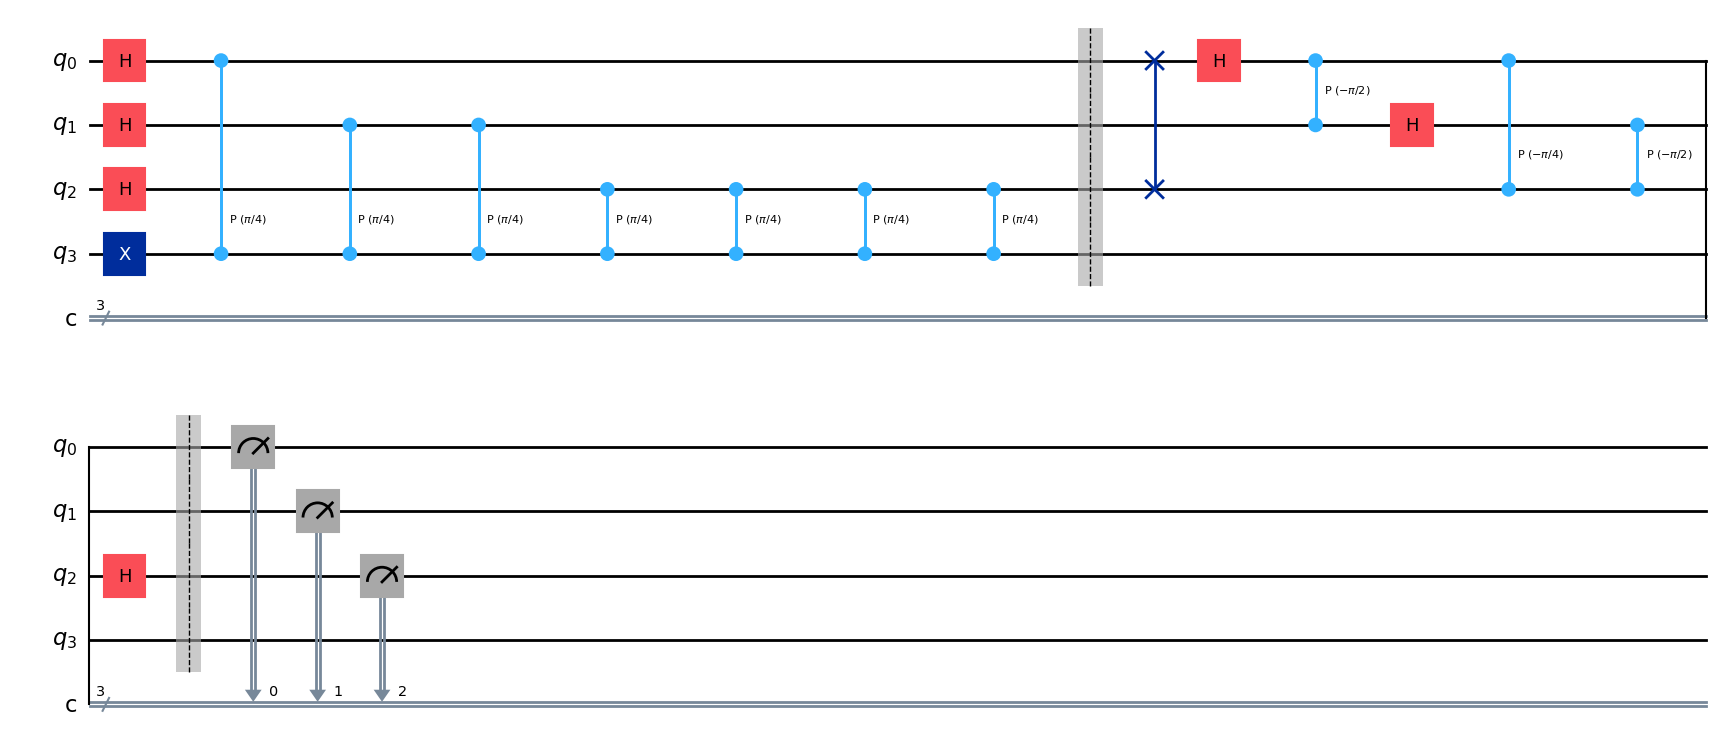


Measurement Results:
{'001': 1024}


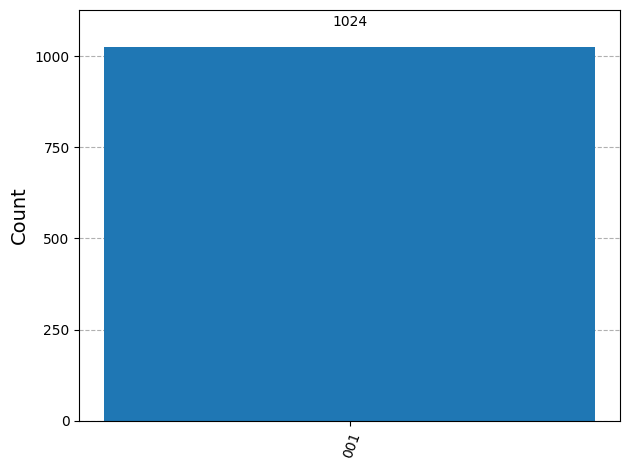

In [1]:
#QPE circuit for T-gate where theta=1/4

from qiskit import QuantumCircuit, transpile, ClassicalRegister, QuantumRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere,plot_state_city,plot_histogram
import numpy as np
import math

#In case of T-gate, psi state is 1. T|1> = e^{i (np.pi)/4} |1>
#Assuming we need 3 extra qubits for counting registers

#Considering out of 4 qubits, 3 will be measured later

#Function: Inverse QFT
def qft_dagger(qc, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m, j)
        qc.h(j)


#Implementing steps in QPE
#Step 1:preparing psi state
qpe = QuantumCircuit(4, 3)
qpe.x(3)

#Step 2: H gates
for qubit in range(3):
    qpe.h(qubit)

#step 3: controlled unitary operations
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.cp(math.pi/4, counting_qubit, 3); # This is CU
    repetitions *= 2

#Step 4:measurement
qpe.barrier()
# Apply inverse QFT
qft_dagger(qpe, 3)
# Measure
qpe.barrier()
for n in range(3):
    qpe.measure(n,n)

display(qpe.draw("mpl"))

#Simulation results
sim = AerSimulator()
result = sim.run([qpe]).result()
counts = result.get_counts(0)
print("\nMeasurement Results:")
print(counts)
plot_histogram(counts)


The result is 001, which converts to 1 in decimal. Then, theta is found from 2^n theta = 1. Since n=3, we get theta=1/8.

### Change theta =1/3

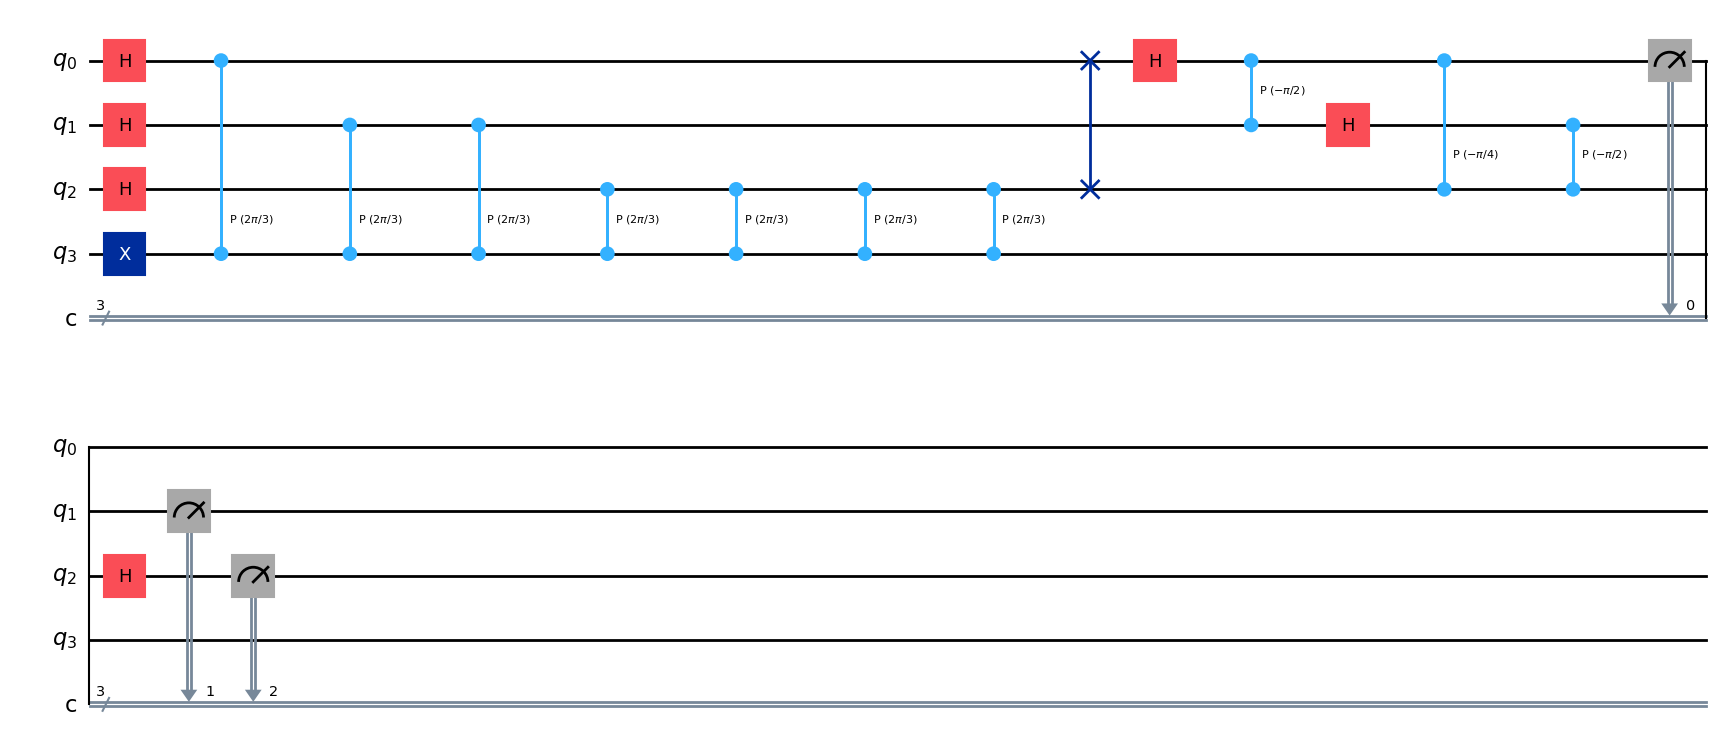


Measurement Results:
{'011': 724, '010': 158, '100': 55, '101': 18, '110': 11, '001': 29, '111': 14, '000': 15}


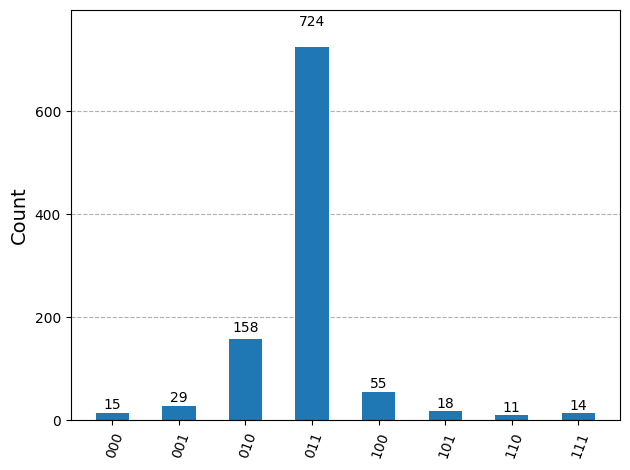

In [3]:
#QPE for theta =1/3
# Create and set up circuit
qpe2 = QuantumCircuit(4, 3)

# Apply H-Gates to counting qubits:
for qubit in range(3):
    qpe2.h(qubit)

# Prepare our eigenstate |psi>:
qpe2.x(3)

# Do the controlled-U operations:
angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe2.cp(angle, counting_qubit, 3);
    repetitions *= 2

# Do the inverse QFT:
qft_dagger(qpe2, 3)

# Measure of course!
for n in range(3):
    qpe2.measure(n,n)

display(qpe2.draw("mpl"))

#Simulation results
sim = AerSimulator()
result = sim.run([qpe2]).result()
counts = result.get_counts(0)
print("\nMeasurement Results:")
print(counts)
plot_histogram(counts)

The above result doesn't give a definite result. There are two possibilities: 010 (2) and 011 (3). The two values gives the results as theta = 0.25 and theta=0.375, respectively. But the actual result is 1/3=0.3333. To get a definite result, we should increase number of counting registers.

### Increasing number of counting registers


Measurement Results:
{'00011': 2, '01100': 43, '01011': 686, '10000': 5, '01001': 29, '01010': 183, '01110': 7, '00000': 1, '00111': 6, '11011': 2, '01000': 16, '10100': 3, '01101': 11, '11111': 2, '00010': 1, '00101': 4, '10001': 1, '00110': 6, '10011': 3, '11010': 1, '10110': 2, '01111': 4, '00100': 1, '11001': 1, '11000': 1, '11100': 1, '00001': 1, '11110': 1}


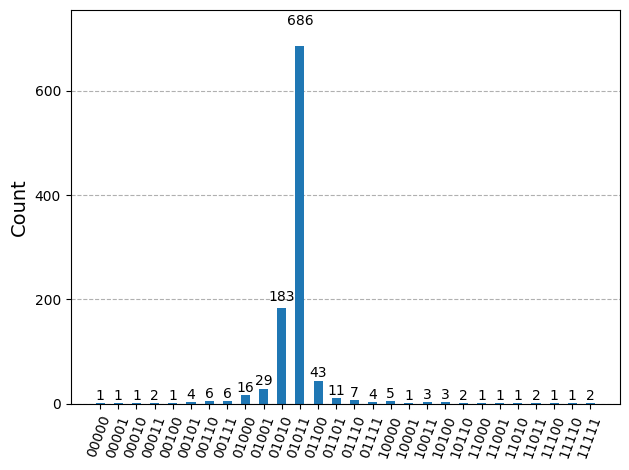

In [4]:
#QPE for theta =1/3 (increasing qubits)
# Create and set up circuit
qpe3 = QuantumCircuit(6, 5)

# Apply H-Gates to counting qubits:
for qubit in range(5):
    qpe3.h(qubit)

# Prepare our eigenstate |psi>:
qpe3.x(5)

# Do the controlled-U operations:
angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(5):
    for i in range(repetitions):
        qpe3.cp(angle, counting_qubit, 5);
    repetitions *= 2

# Do the inverse QFT:
qft_dagger(qpe3, 5)

# Measure of course!
for n in range(5):
    qpe3.measure(n,n)

qpe3.draw("mpl")

#Simulation results
sim = AerSimulator()
result = sim.run([qpe3]).result()
counts = result.get_counts(0)
print("\nMeasurement Results:")
print(counts)
plot_histogram(counts)

When we increase number of qubits, we see the sharp distinction for |01011> state. From this, the theta is equal to x = 2^n (theta) => theta = x/2^n = 11/32 =0.34375. And, the exact answer is 1/3 = 0.333...

## For a Pauli matrix (example: Z gate)

Z = {{1,0},{0,-1}}

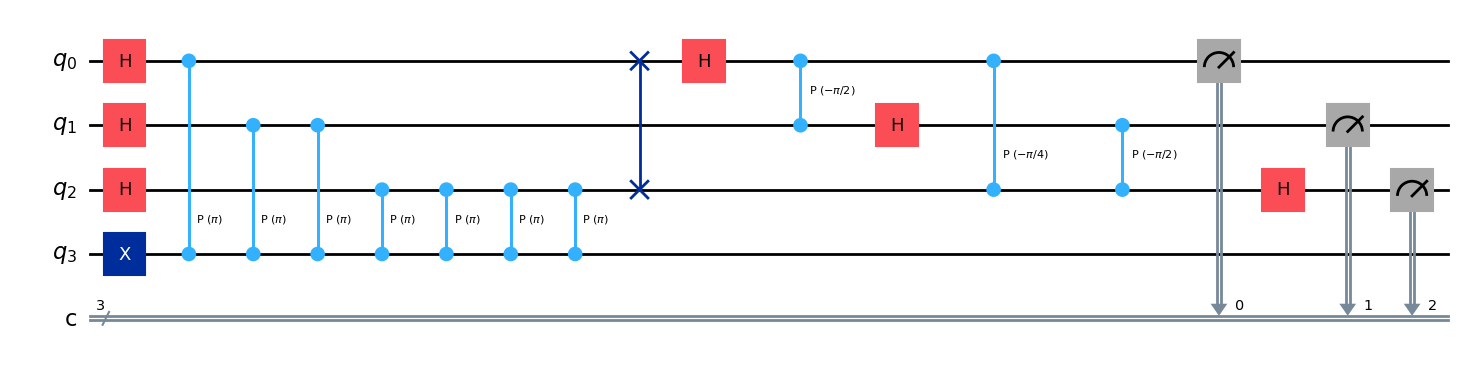


Measurement Results:
{'100': 1024}


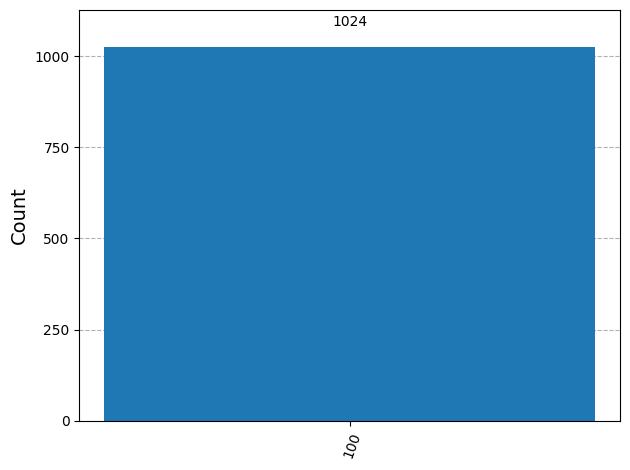

In [9]:
#QPE for Pauli matrix Z ={{1,0},{0,-1}}

#number of qubits
nq=3

# Create and set up circuit
qpe4 = QuantumCircuit(nq+1, nq)

# Prepare our eigenstate |psi>=|1> or |0>:
qpe4.x(nq)

# Apply H-Gates to counting qubits:
for qubit in range(nq):
    qpe4.h(qubit)

# Do the controlled-U operations:
angle = math.pi
repetitions = 1
for counting_qubit in range(nq):
    for i in range(repetitions):
        qpe4.cp(angle,counting_qubit, nq);
    repetitions *= 2

# Do the inverse QFT:
qft_dagger(qpe4, nq)

# Measure of course!
for n in range(nq):
    qpe4.measure(n,n)


display(qpe4.draw("mpl"))

#Simulation results
sim = AerSimulator()
result = sim.run([qpe4]).result()
counts = result.get_counts(0)
print("\nMeasurement Results:")
print(counts)

plot_histogram(counts)


Since Pauli matrix Z has two eigen values, +1 and -1. So, to get both states, we have to modify the initial state.
For +1 eigen value, the eigen state is |0>. Similarly, for -1 eigen value, the eigen state is |1>.

## Arbitrary Matrix

QPE is used to find the eigen values of an matrix. Given matrix A, find eigen values of A.

Step 1: Create a unitary matrix U using A as U = exp(i A t) where t depends on magnitude of eigen values.

Step 2: Find the parameter angles for matrix representation of U(theta, phi, lambda, gamma) by comparing with above U.

For an arbitrary matrix, it is easy to use CU gates

### Example 1: A = {{1,-1/2},{-1/2,1}}

For above matrix A, eigen values are 1/2 and 3/2 and eigen vectors are {1 1} and {1 -1}. As 3/2 >1, we choose the t = pi. Then, U = exp{i A t} = {{0,i},{i,0}}. For this, we find theta = pi, phi = pi/2, lambda = -pi/2 and gamma = 0.


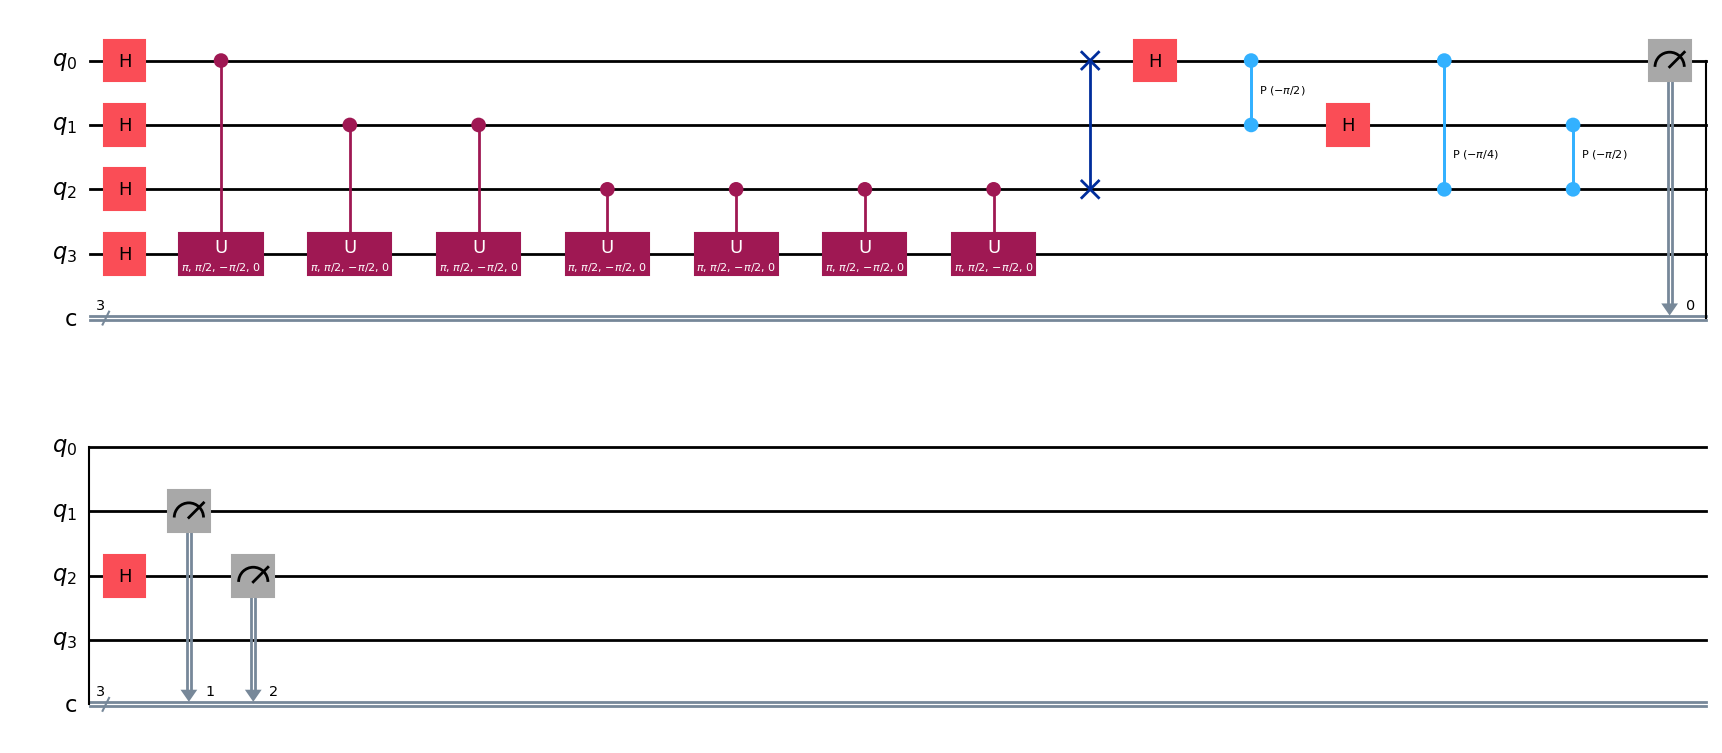

Measurements counts:{'010': 1024}


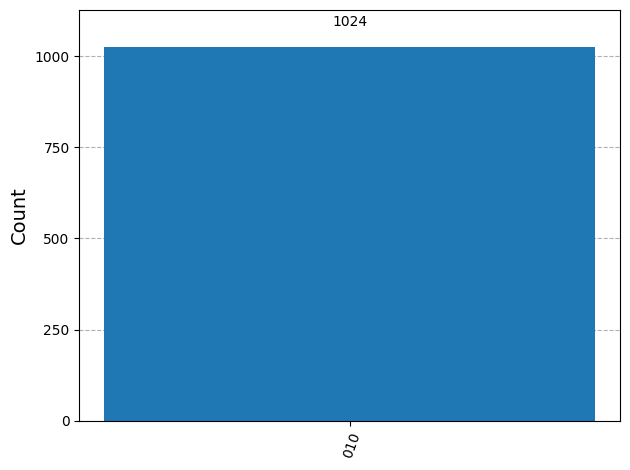

In [19]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import numpy as np

#For a random matrix A={{1,-1/2},{-1/2,1}}

qpe = QuantumCircuit(4, 3)

# StatePreparation: |+> or |-> for the eigenstate
# creates |+⟩ = (|0⟩ + |1⟩)/√2 → eigenvector of λ=1/2
# creates |−⟩ = (|0⟩ − |1⟩)/√2 → eigenvector of λ=3/2
#qpe.x(3)
qpe.h(3) 

# Apply H gates
for qubit in range(3):
    qpe.h(qubit)

# Apply controlled U^2t gates
for i in range(3):
    for j in range(2**i):
        qpe.cu(math.pi, math.pi/2, -math.pi/2, 0, i, 3)

# Inverse QFT
qft_dagger(qpe, 3)

#measurement
for n in range(3):
    qpe.measure(n,n)

#Displaying circuit
display(qpe.draw('mpl'))


# Run simulation
sim = AerSimulator()
result = sim.run([qpe]).result()
counts = result.get_counts(0)
print(f"Measurements counts:{counts}")
plot_histogram(counts)

### Example 2: A = {{1,-1/3},{-1/3,1}}

# Inverse Quantum Phase Estimation (IQPE)

QFT function definition

In [20]:
#Defining function for generalized rotations
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(np.pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)

#defining function to swap the final qubits
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

#defining function to perform QFT using qft_rotations and swap_registers
def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

Applying Inverse QPE to Example 1 solution

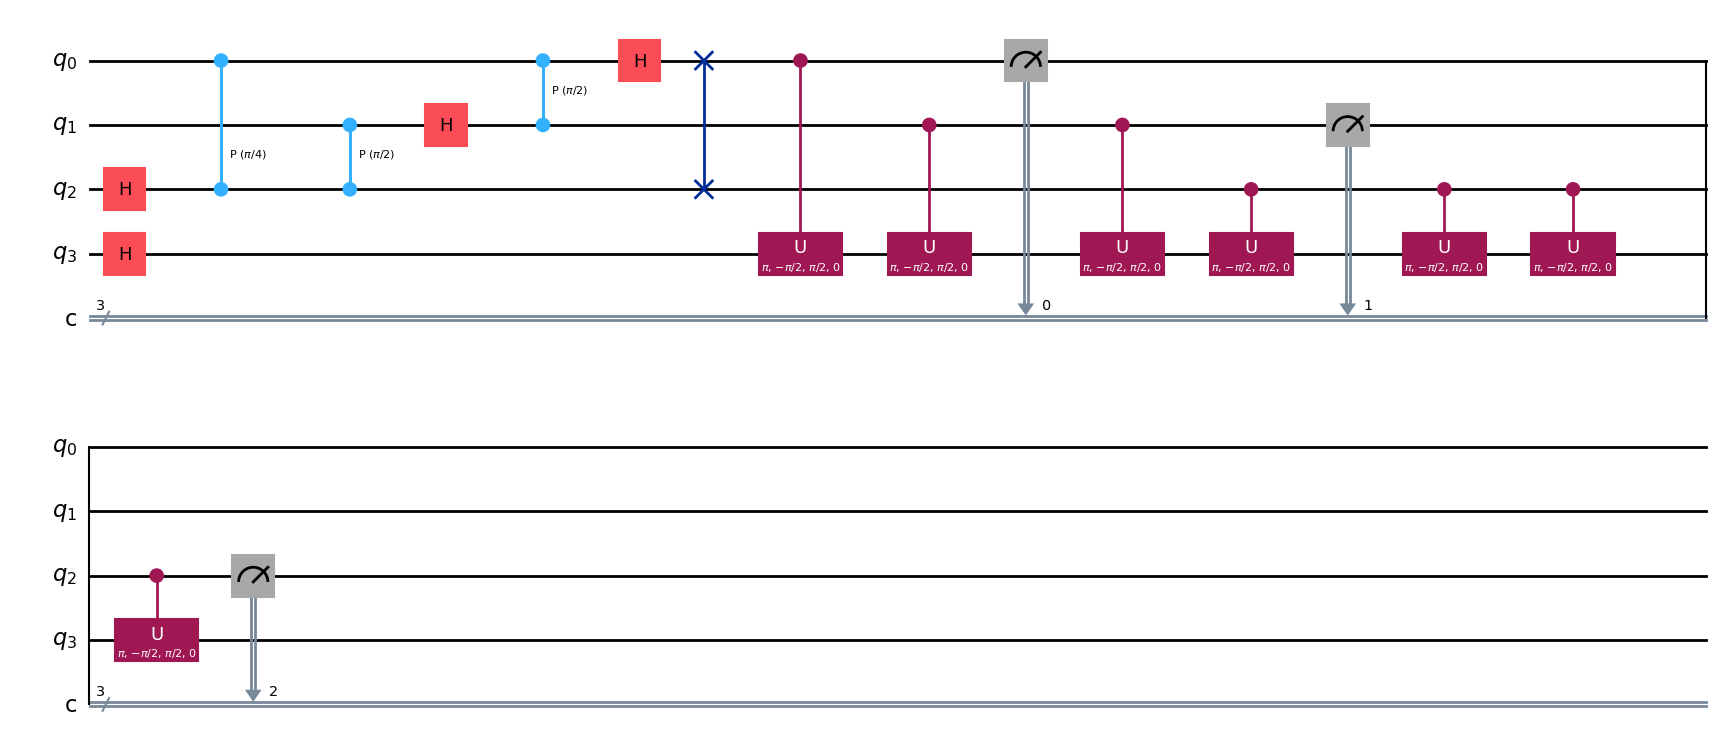

Measurements counts:{'110': 115, '101': 140, '011': 136, '010': 120, '001': 130, '100': 127, '000': 123, '111': 133}


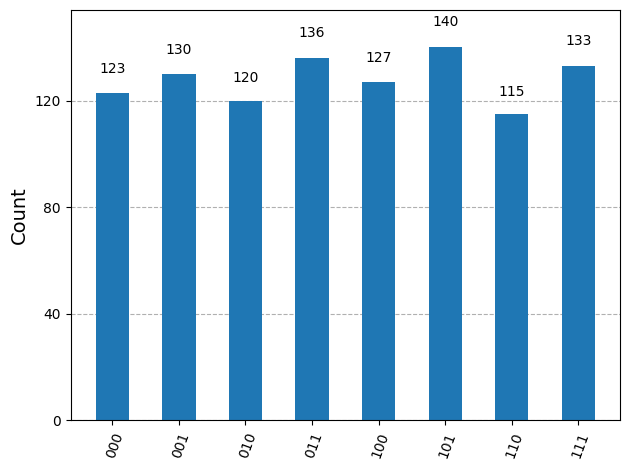

In [22]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import numpy as np

qpe = QuantumCircuit(4, 3)

# StatePreparation: |+> or |-> for the eigenstate
# creates |+⟩ = (|0⟩ + |1⟩)/√2 → eigenvector of λ=1/2
# creates |−⟩ = (|0⟩ − |1⟩)/√2 → eigenvector of λ=3/2
#qpe.x(3)
qpe.h(3) 

#Applying Inverse QPE : QFT + controlled U^-2t rotations
#Apply QFT 
qft(qpe,3)

# Apply controlled U^-2t gates
for i in range(3):
    for j in range(2**i):
        qpe.cu(math.pi, -math.pi/2, math.pi/2, 0, i, 3)

#measurement
for n in range(3):
    qpe.measure(n,n)

#Displaying circuit
display(qpe.draw('mpl'))


# Run simulation
sim = AerSimulator()
result = sim.run([qpe]).result()
counts = result.get_counts(0)
print(f"Measurements counts:{counts}")
plot_histogram(counts)

When you do inverse QPE, the state get decoupled and results in an equally distributed states.